# Bharat Intern - VIRTUAL INTERNSHIP PROGRAM 2023
# April 2023
## By - Rajan Kumar 

# TASK:- 2

Here is the little description about Iris dataset.

The data set consists of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

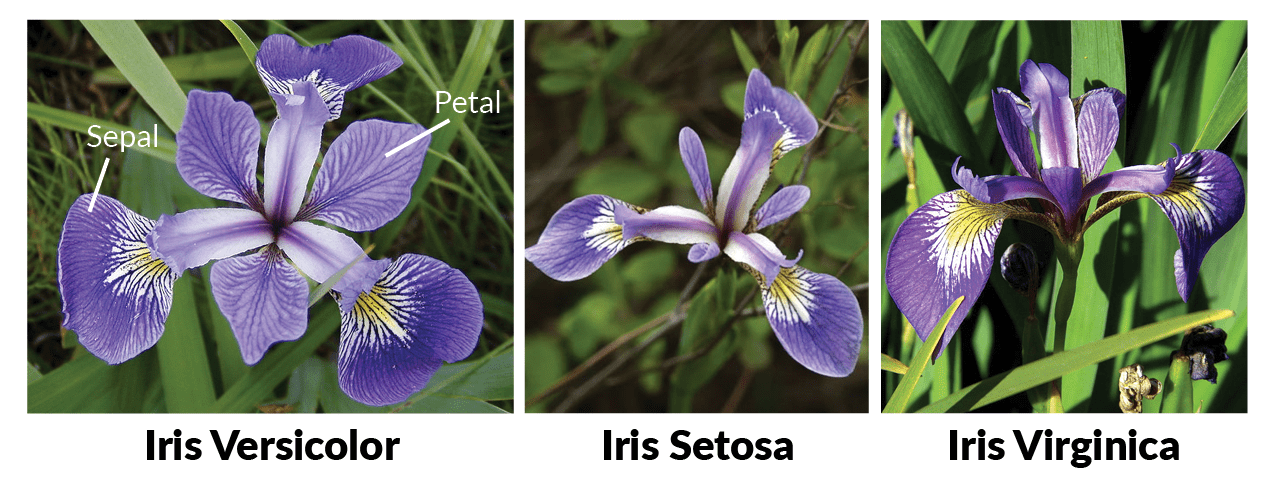

**Objective:**

Our main objective is to classify the flowers into their respective species - Iris setosa, Iris virginica and Iris versicolor by using various possible plots.

## Import  Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm, datasets

## Import Dataset

In [2]:
df = pd.read_csv("C:\\Users\\Rajan Kumar\\OneDrive\\Desktop\\NIET Documents\\My Internship\\Bharat intern\\Task 3 Iris Flower Classification\\Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Inspection

In [4]:
df.shape

(150, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


`Conclusion` : From the above information we can see that it is a balanced dataset.

In [6]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [8]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [9]:
#Dropping unnecessary columns
df = df.drop('Id', axis=1)
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


## Analysing the Dataset

In [10]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

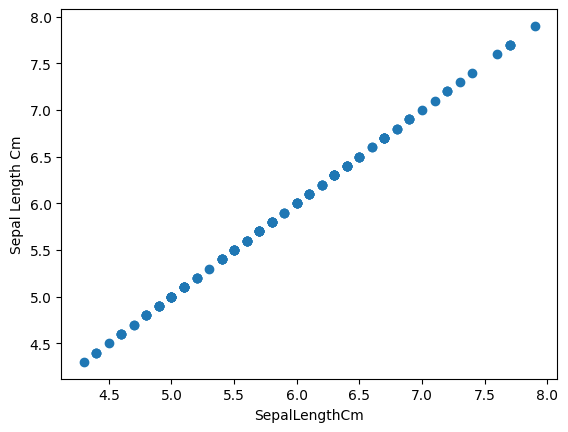

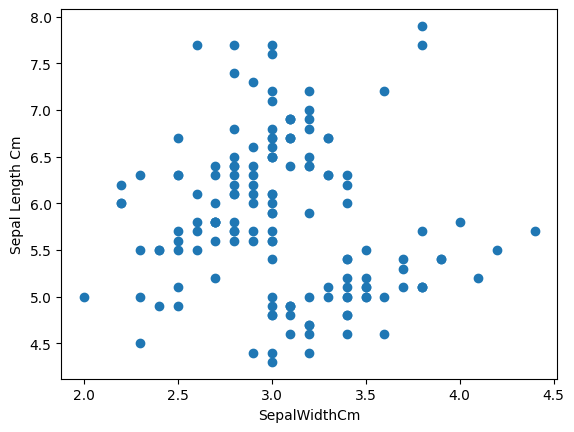

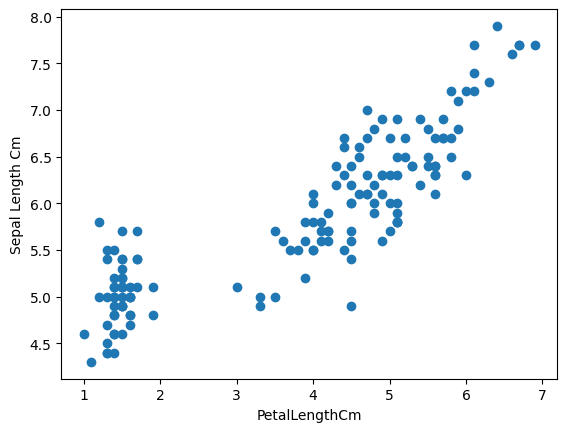

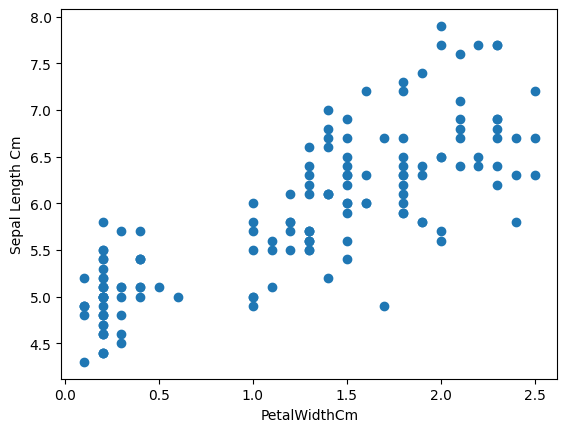

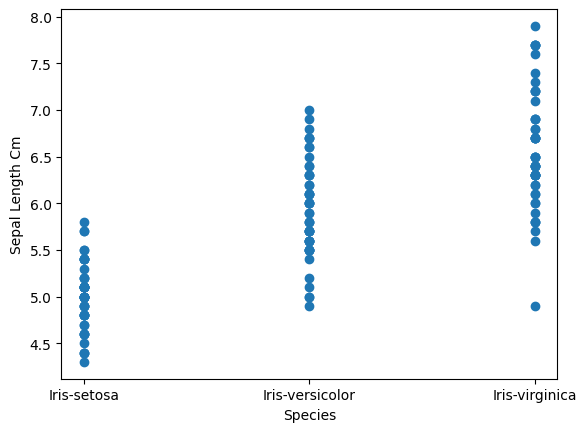

In [11]:
for i in df.columns:
    plt.scatter(df[str(i)],df['SepalLengthCm'])
    plt.xlabel(i)
    plt.ylabel("Sepal Length Cm")
    plt.show()

`Conclusion:` The plot doesnot convey much information about the nature of distribution of the sepal length vs sepal width. Hence, we would use different colours(based on their class type) to interpret the distribution nature.

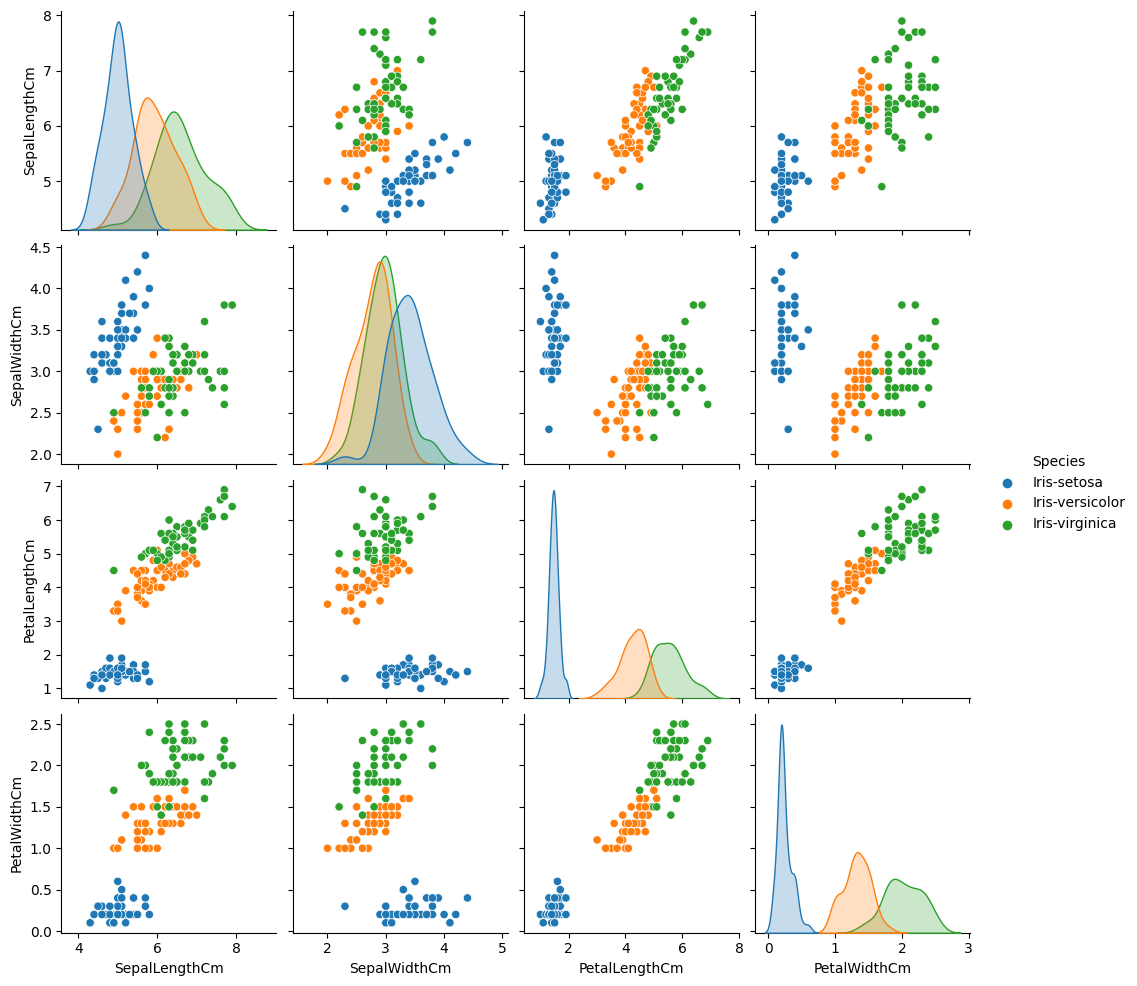

In [12]:
sns.pairplot(df, hue ='Species')

**`Inferences`**
1. Iris-Setosa can be easily differentiated
2. Iris-Versicolor and Iris-Virginica are overlaping in most of the plot, making it difficult for us to differentiate
3. The graph of Petal Length vs Petal Width shows us the best result that can be used to segregate Iris-Versicolor and Iris-Virginica

## Correlation Between the numeric variables

In [13]:
df.corr()

C:\Temp\ipykernel_15056\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


## Plotting the correlation using a heatmap

C:\Temp\ipykernel_15056\74255487.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues',annot = True)


<AxesSubplot: >

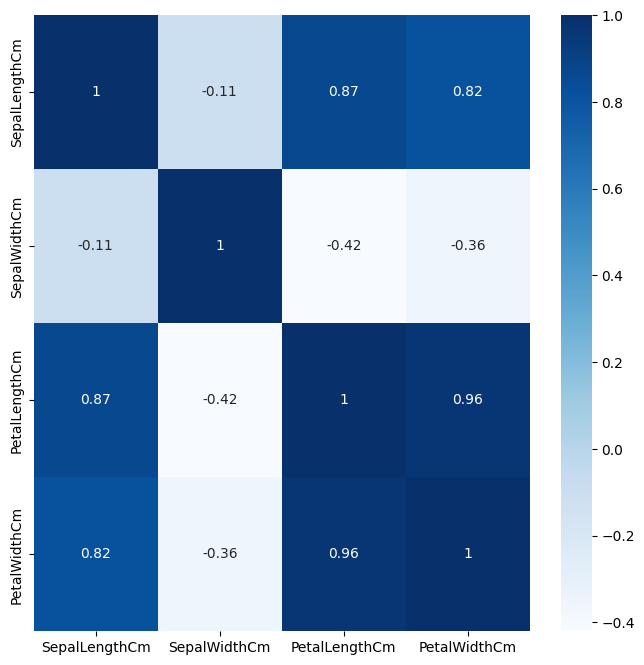

In [14]:
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), cmap='Blues',annot = True)

**`Conclusion:`**

1. From the graph, it can be clearly seen that the columns Petal length and petal width hold a strong correlation (=0.96). Earlier we had got the same observations while plotting a pairplot.
2. Apart from this, the columns Sepal length and Petal length also hold a high corelation(=0.87).
3. Sepal length and Petal width alzo hold a good correlation (=0.82).

# Observing the distribution nature of all the 4 columns (Using a Distplot)

In [15]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

C:\Temp\ipykernel_15056\416676403.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[e])
C:\Temp\ipykernel_15056\416676403.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[e])
C:\Temp\ipykernel_15056\416676403.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed

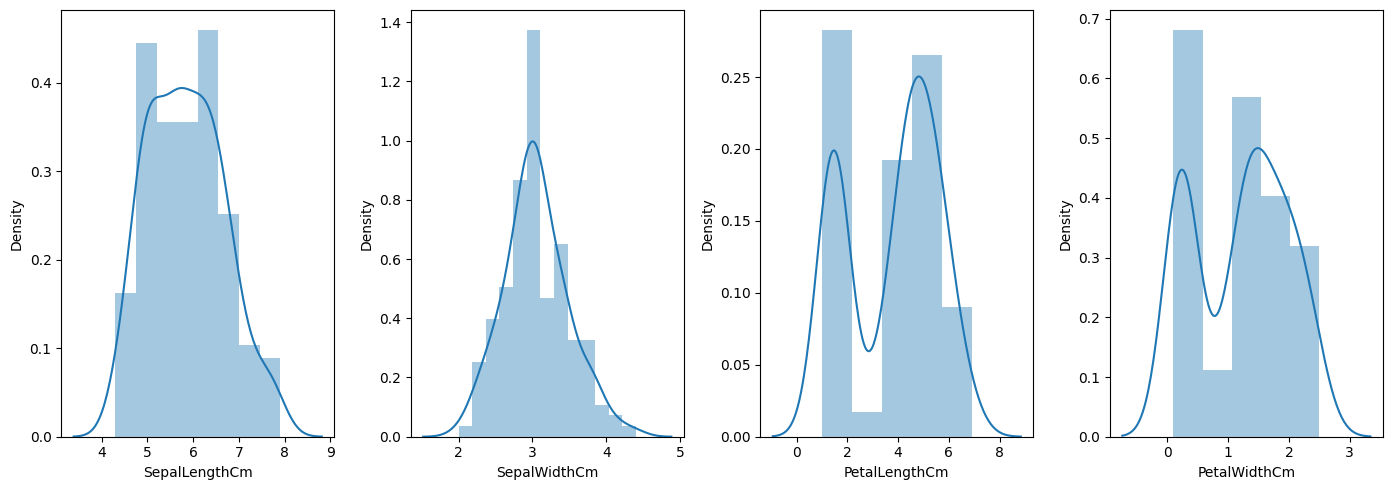

In [16]:
col = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
plt.figure(figsize=(35,5))
i = 1
for e in col:
    plt.subplot(1,10,i)
    sns.distplot(df[e])
    i = i + 1
plt.tight_layout()
plt.show()

### Conclusion:
It can be observed from the above distplots that the distribution of the columns follow a Normal distribution

## Observing the distribution of the data across the various columns using a Histogram

In [17]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Using the describe() we can see that the maximum value for the columns:

* Sepal Length = **8**
* Sepal Width = **5**
* Petal length = **7**
* Petal Width = **3**

Hence, we'll set our bin size of the histogram based on the above specified values.

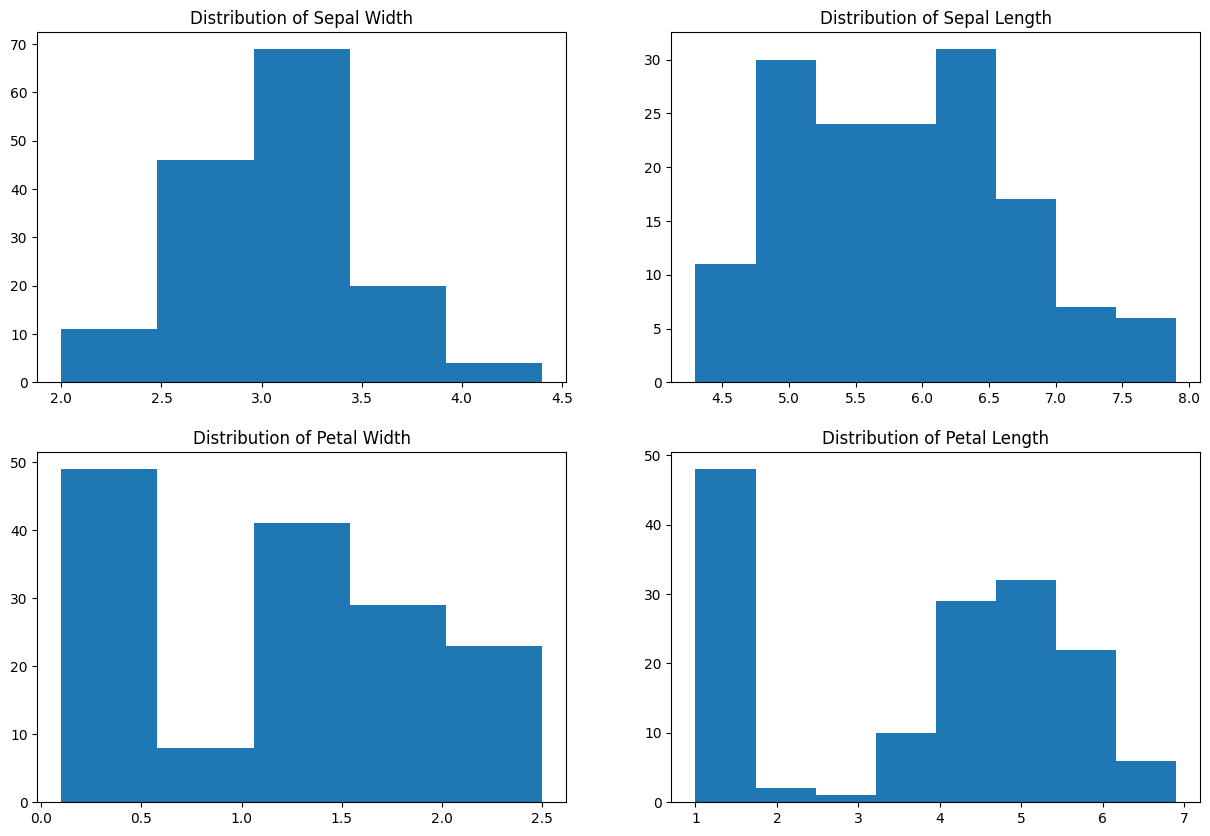

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
axes[0,0].set_title("Distribution of Sepal Width")
axes[0,0].hist(df['SepalWidthCm'], bins=5);
axes[0,1].set_title("Distribution of Sepal Length")
axes[0,1].hist(df['SepalLengthCm'], bins=8);
axes[1,0].set_title("Distribution of Petal Width")
axes[1,0].hist(df['PetalWidthCm'], bins=5);
axes[1,1].set_title("Distribution of Petal Length")
axes[1,1].hist(df['PetalLengthCm'], bins=8)
plt.show()

### Conclusions:
* The highest frequency of Sepal length ranges between 6.0 - 6.5 which is around 32
* The highest frequency of Sepal Width ranges between 3.0 - 3.5 which is around 69
* The highest frequency of Petal length ranges between 1.0 - 1.8 which is around 50
* The highest frequency of Petal Width ranges between 0.0 - 0.5 which is around 50

## Univariate Analysis of all the 4 columns(using Distplots)

c:\Users\Rajan Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Rajan Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

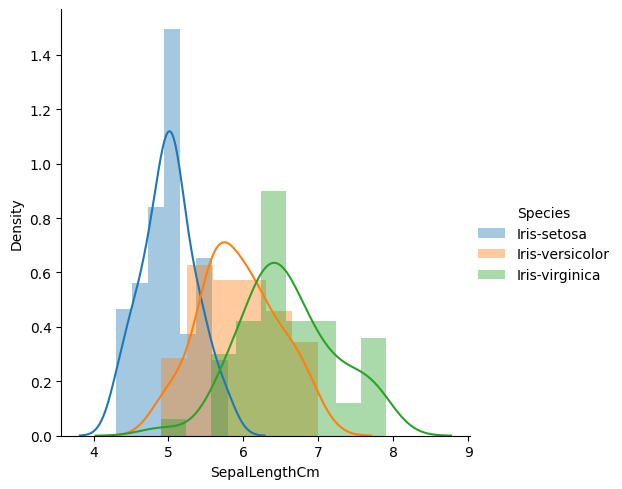

In [19]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"SepalLengthCm").add_legend()

### Conclusion:
It can be clearly seen that the flower species cannot be seperated based on the Sepal length as the values overlap a lot.

c:\Users\Rajan Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Rajan Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

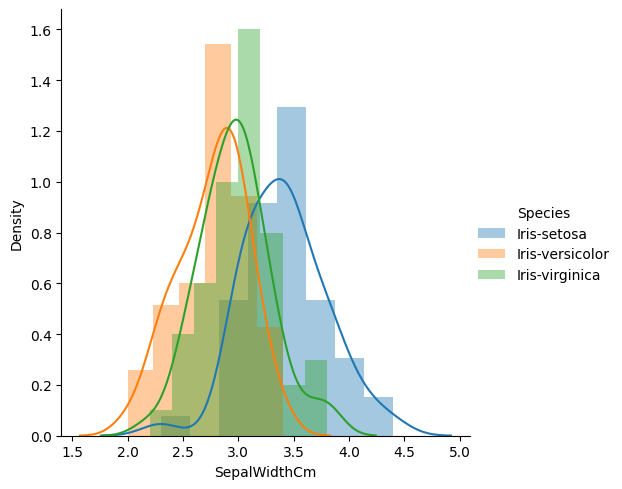

In [20]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"SepalWidthCm").add_legend()

### Conclusion:
It can be clearly seen that the flower species cannot be seperated based on the Sepal Width as here also, the values overlap a lot. the overlapping is more intense in this case as compared to the overlapping in the case of Sepal Length.

c:\Users\Rajan Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Rajan Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

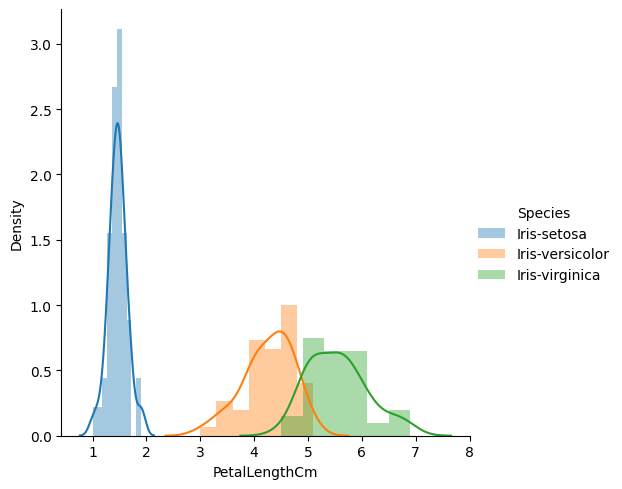

In [21]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"PetalLengthCm").add_legend()

### Conclusion:
From the graph, it can be seen that Setosa is easily segregable, whereas Versicolor and Virginica do overlap at some points (near 4.5-5). The column Petal length can be used to seperate the species 

c:\Users\Rajan Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
c:\Users\Rajan Kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:848: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750b

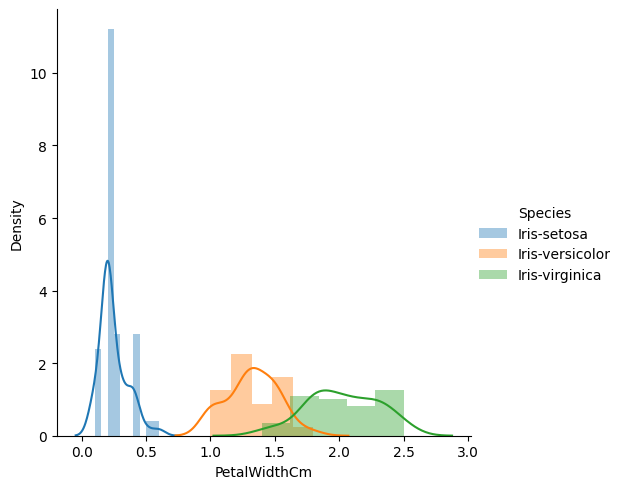

In [22]:
sns.FacetGrid(df,hue="Species",height=5).map(sns.distplot,"PetalWidthCm").add_legend()

### Conclusion:
From the graph, it can be seen that Setosa is easily segregable, whereas Versicolor and Virginica do overlap at some points (near 1.5-2.0). The column Petal Width can also be used to seperate the species .

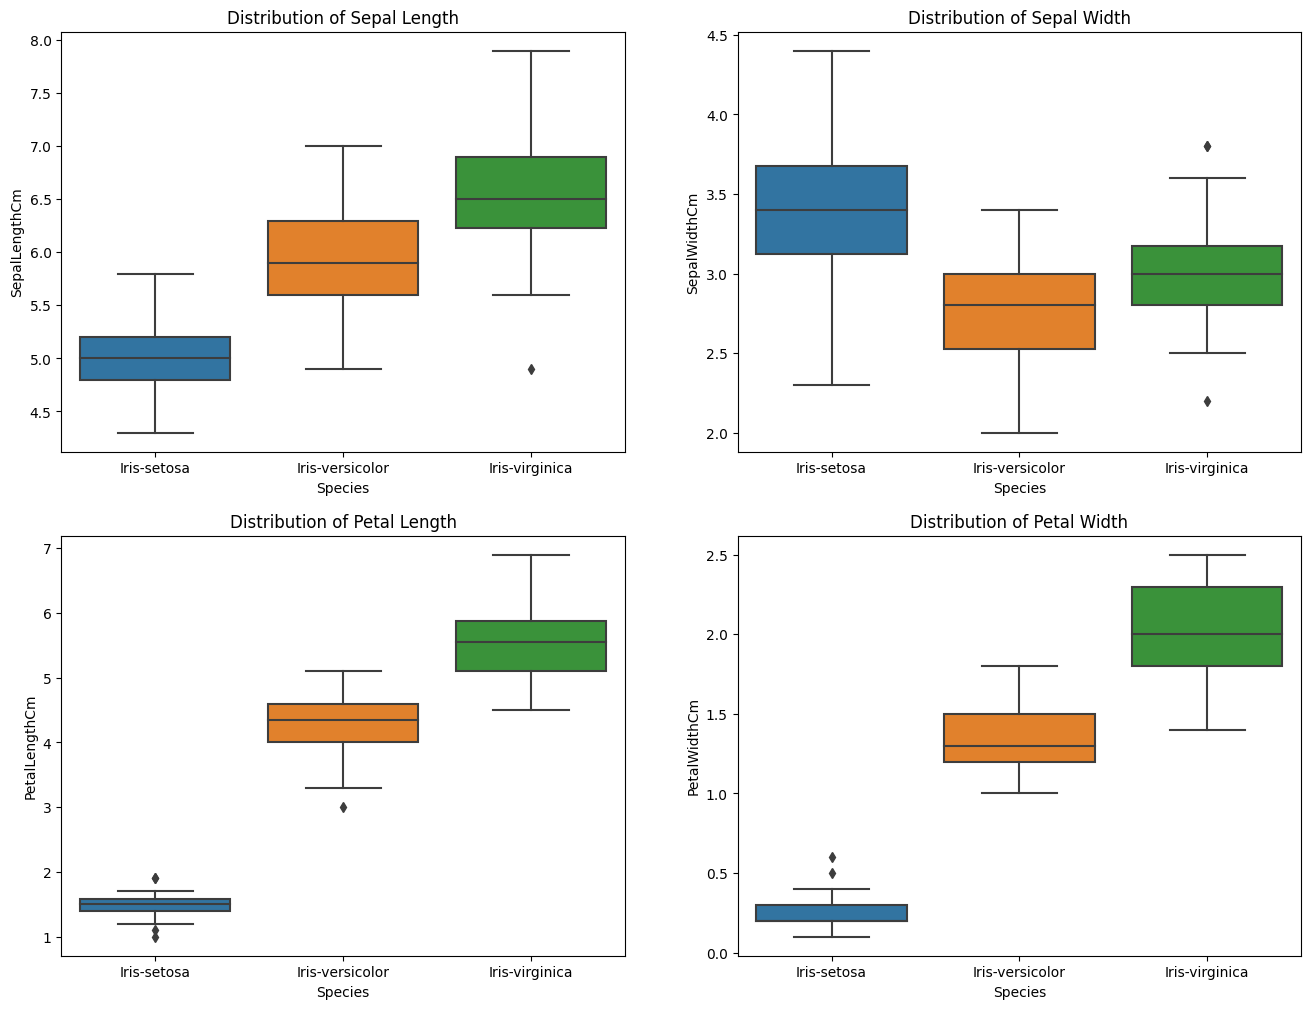

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))
axes[0,0].set_title("Distribution of Sepal Length")
sns.boxplot(y="SepalLengthCm", x= "Species", data=df,  orient='v' , ax=axes[0, 0])
axes[0,1].set_title("Distribution of Sepal Width")
sns.boxplot(y="SepalWidthCm", x= "Species", data=df,  orient='v' , ax=axes[0, 1])
axes[1,0].set_title("Distribution of Petal Length")
sns.boxplot(y="PetalLengthCm", x= "Species", data=df,  orient='v' , ax=axes[1, 0])
axes[1,1].set_title("Distribution of Petal Width")
sns.boxplot(y="PetalWidthCm", x= "Species", data=df,  orient='v' , ax=axes[1, 1])
plt.show()

### Conclusions:

We can see that the species Setosa doesnot have any outliers in case of Sepal Length or Sepal Width, however, it does have few outliers in Petal length and Petal Width.
In terms of features like: Petal Width / Length, Virginca has quiet high values as compared to the other two species. Also, Setosa has the least values for the same features.
It is also observed that for the feature Sepal Width, Setosa has a wide range of values as compared to the other species

### Let's Dive a lil Deeper !!
To furthur analyze the distribution we are using a violin plot.

Violin plots are used when you want to observe the distribution of numeric data, and are especially useful when you want to make a comparison of distributions between multiple groups. The peaks, valleys, and tails of each group's density curve can be compared to see where groups are similar or different.

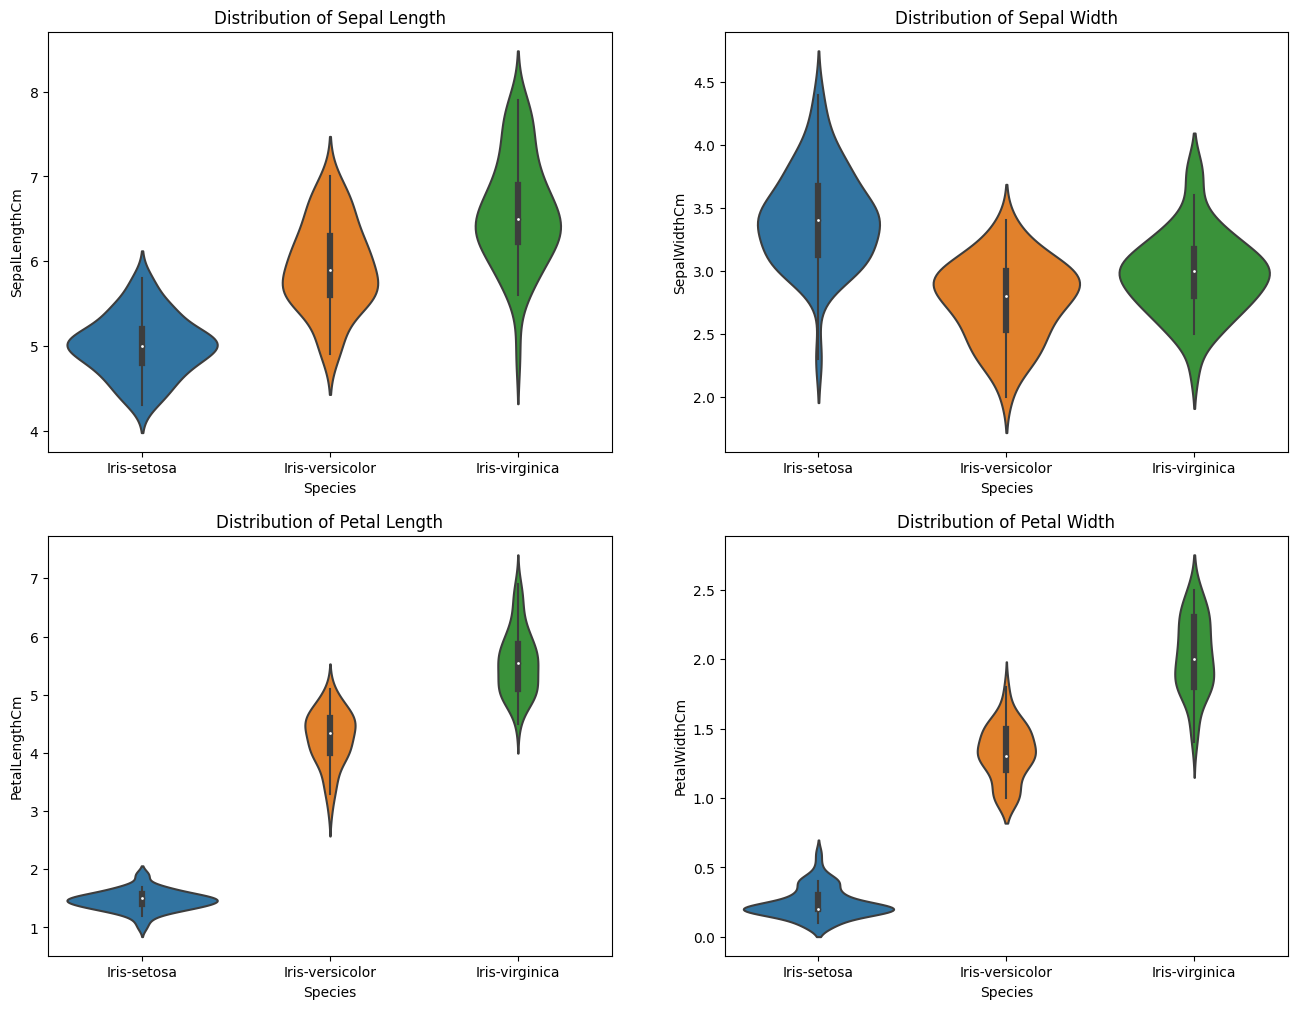

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))
axes[0,0].set_title("Distribution of Sepal Length")
sns.violinplot(y="SepalLengthCm", x= "Species", data=df,  orient='v' , ax=axes[0, 0])
axes[0,1].set_title("Distribution of Sepal Width")
sns.violinplot(y="SepalWidthCm", x= "Species", data=df,  orient='v' , ax=axes[0, 1])
axes[1,0].set_title("Distribution of Petal Length")
sns.violinplot(y="PetalLengthCm", x= "Species", data=df,  orient='v' , ax=axes[1, 0])
axes[1,1].set_title("Distribution of Petal Width")
sns.violinplot(y="PetalWidthCm", x= "Species", data=df,  orient='v' , ax=axes[1, 1])
plt.show()

### Conclusions:

The kernel density in the Violin plots helps us understand the full distribution of the data in terms of density.

## Final Conclusions

* The dataset is completely balanced i.e. equal number of records are present for each of the three species.
* Here our target column is Species, as we need to segregate the flowers as per their species based on the 4 fetaures namely, Sepal Length, Sepal Width, Petal Length and Petal Width .
* The columns Petal length and petal width hold a strong correlation (=0.96) and can be used to segregate the flowers.
* By plotting various graphs, we can conclude that:
* The Setosa species is easily segregable because of its small feature value range.
* The Versicolor and Virginca species are a bit difficult to seperate because they overlap at many points in terms of their features.

# Thank You